In [1]:
# Reentrega
# Voy a poner un resumen de los pasos que he hecho para corregir los errores, 
# el mas importante es que no entendi bien lo que hacia con train y test, tenia claro que no podia usar test para el dataleake, pero
# no pense que era apartir de la parte de entrenamiento, luego me lie y lo fui usando, todo mal. 

# el gran cambio viene aqui 

# train, test = train_test_split(raw_data, test_size=0.2, shuffle=True, random_state=42)
# train.to_csv('./data/train_airbnb.csv', sep=';', decimal='.', index=False)
# df = pd.read_csv('./data/train_airbnb.csv', sep=';', decimal='.')

# con el df me evito cometer el mismo error de antes y tengo claro que solo trabajo con train 


In [2]:
#1. CARGA DE DATOS

In [3]:
# Ya tuve problemas emepzando con la carga, se me ocurrio abrir el excel con el open office y me peto el ordenador, mientras estaba bloqueado le di a crt + s para ver si respondia
#y me guardo el archivo en xlxs hasta que me di cuenta estuve un buen rato, viendo que esta mal
# Importa las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

import seaborn as sns
%matplotlib inline

# Carga de datos
raw_data = pd.read_csv("./data/airbnb-listings-extract.csv", sep=';', decimal='.')

# 2. Elimino Weekly Price y Monthly (por lo que me comentaste)
raw_data = raw_data.drop(['Weekly Price', 'Monthly Price'], axis=1, errors='ignore')

# Division de train y test
train, test = train_test_split(raw_data, test_size=0.2, shuffle=True, random_state=42)

# Guardo los ficheros
train.to_csv('./data/train_airbnb.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/test_airbnb.csv', sep=';', decimal='.', index=False)

# Esto lo hago para no equivocarme otra vez
del raw_data
del test 

# A partir de ahora, "df" es tu única variable de trabajo.
# A partir de aqui he borrado todos los test. que habia hecho para solo estar con df
df = pd.read_csv('./data/train_airbnb.csv', sep=';', decimal='.')
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,8494011,https://www.airbnb.com/rooms/8494011,20170407214119,2017-04-08,CITY CENTER LATINA B ROOM 2,"Se trata de un gran piso de diez habitaciones,...",Todas las camas del piso son de matrimonio. Se...,"Se trata de un gran piso de diez habitaciones,...",none,Se trata de una de las zonas más emblemáticas ...,...,10.0,10.0,10.0,NaN,NaN,strict,97.0,0.11,"40.4102231405,-3.70867805612","Host Has Profile Pic,Is Location Exact,Require..."
1,16865230,https://www.airbnb.com/rooms/16865230,20170407214119,2017-04-08,Tu SUITE en el corazón de MALASAÑA,The apartment in Madrid has 1 bedrooms and has...,The apartment in Madrid has 1 bedrooms and has...,The apartment in Madrid has 1 bedrooms and has...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"40.4272898629,-3.70437160544","Host Has Profile Pic,Host Identity Verified,Re..."
2,9695108,https://www.airbnb.com/rooms/9695108,20170507222235,2017-05-08,Room in amazing Kreuzberg-Neukoln,Renting my room at Weserstrasse during Christm...,NaN,Renting my room at Weserstrasse during Christm...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"52.4832726772,13.4425265568","Host Has Profile Pic,Host Identity Verified,Is..."
3,18088037,https://www.airbnb.com/rooms/18088037,20170407214119,2017-04-08,Habitación con balcón en la Latina!,Habitación acogedora en un apartamento con enc...,Estudiantes y jóvenes profesionales,Habitación acogedora en un apartamento con enc...,none,El piso está ubicado en el famoso barrio de La...,...,NaN,NaN,NaN,NaN,NaN,strict,38.0,NaN,"40.4123714758,-3.71252881444","Host Has Profile Pic,Host Identity Verified,Is..."
4,3137010,https://www.airbnb.com/rooms/3137010,20170315084710,2017-03-15,Vista Hermosa-Apartment,"1 Bedroom (with bathroom) opens to the big, mi...",1-Bedroom apartment with amazing views. Fall a...,"1 Bedroom (with bathroom) opens to the big, mi...",none,Vista Hermosa like the majority of buildings i...,...,10.0,10.0,9.0,NaN,NaN,strict,1.0,1.58,"39.3674540905,3.22948720166","Host Has Profile Pic,Is Location Exact,Require..."


In [4]:
train.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10286.000000,11822.000000,11822.000000,11824.000000,11824.000000,11824.000000,11778.000000,...,11824.000000,9169.000000,9149.000000,9154.000000,9142.000000,9156.000000,9139.000000,9139.000000,11821.000000,9283.000000
mean,1.026022e+07,2.017037e+13,3.605968e+07,94.742660,12.542294,12.542294,40.497385,-3.838638,3.264970,1.281245,...,22.465071,91.684371,9.412723,9.327616,9.618792,9.645151,9.532662,9.212058,9.478048,1.865575
std,5.557168e+06,5.726876e+08,3.417099e+07,15.337695,34.215496,34.215496,4.590549,14.010897,2.091109,0.656424,...,37.715834,9.034297,0.930438,0.990421,0.801247,0.770007,0.777009,0.958257,23.630338,1.864372
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.556205e+06,2.017041e+13,6.773300e+06,99.000000,1.000000,1.000000,40.409737,-3.707535,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.123371e+07,2.017041e+13,2.468248e+07,100.000000,2.000000,2.000000,40.419453,-3.700769,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.190000
75%,1.531757e+07,2.017041e+13,5.434329e+07,100.000000,6.000000,6.000000,40.430843,-3.684171,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858124e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.956716,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [5]:
# Como vimos en las clases, identificadores numericos, en estos modelos no nos aportan mucho al no ser predictivos, asi que los quitamos de en medio

In [6]:
# Siguiendo el esquema del enunciado de la practica voy a ir viendo 
# a. Head, describe, dtypes, etc.
# b. Outliers
# c. Correlación
# Valores nulos y que podamos eliminar porque no aporten 

In [7]:
# las columnas que queremos eliminar
col_eliminar = ['ID', 'Scrape ID', 'Host ID']

# Las eliminamos de TRAIN
train = train.drop(col_eliminar, axis=1)
print(train.head(3).T)

                                                                            4462   \
Listing Url                                  https://www.airbnb.com/rooms/8494011   
Last Scraped                                                           2017-04-08   
Name                                                  CITY CENTER LATINA B ROOM 2   
Summary                         Se trata de un gran piso de diez habitaciones,...   
Space                           Todas las camas del piso son de matrimonio. Se...   
...                                                                           ...   
Cancellation Policy                                                        strict   
Calculated host listings count                                               97.0   
Reviews per Month                                                            0.11   
Geolocation                                          40.4102231405,-3.70867805612   
Features                        Host Has Profile Pic,Is Location 

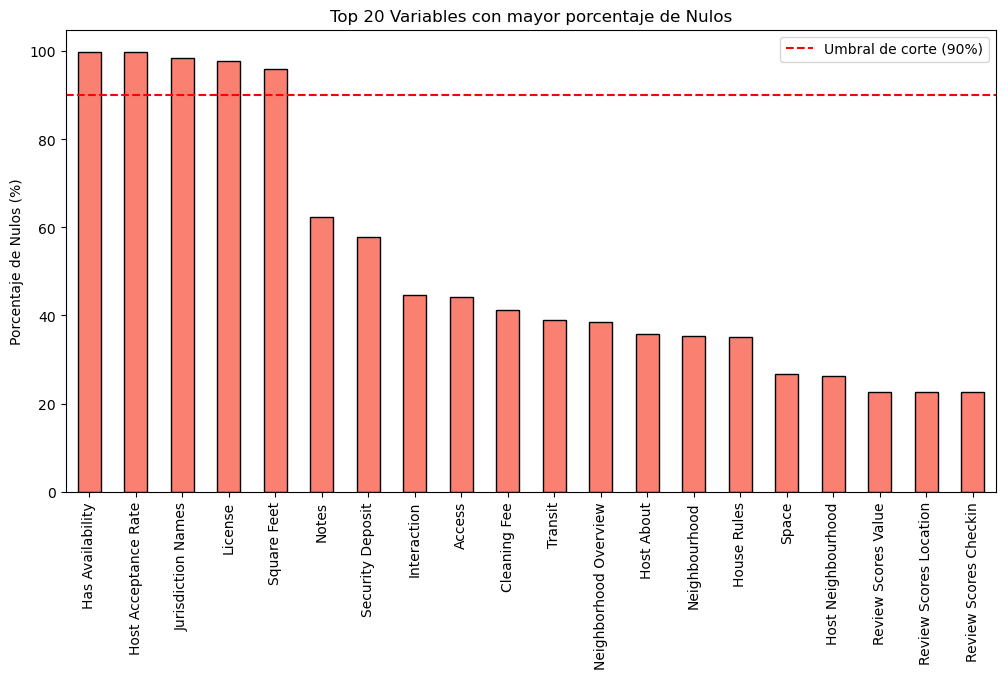

Columnas con más nulos:
Has Availability                  99.906969
Host Acceptance Rate              99.720907
Jurisdiction Names                98.511502
License                           97.708051
Square Feet                       96.016576
Notes                             62.254736
Security Deposit                  57.848444
Interaction                       44.570365
Access                            44.232070
Cleaning Fee                      41.356563
Transit                           39.047700
Neighborhood Overview             38.531800
Host About                        35.715494
Neighbourhood                     35.436401
House Rules                       35.098106
Space                             26.666103
Host Neighbourhood                26.251691
Review Scores Value               22.708051
Review Scores Location            22.708051
Review Scores Checkin             22.682679
Review Scores Accuracy            22.623478
Review Scores Cleanliness         22.581191
Review S

In [8]:
# Ahora analizo los valores nulos, como en clase, si un campo tiene un 90% valores nulos valoramos eliminarlo, mas que imputarlo
# Calculamos el porcentaje de nulos por columna
null_porcentaje = train.isnull().mean() * 100

# Filtramos solo las que tienen algún nulo y ordenamos de mayor a menor
null_porcentaje = null_porcentaje[null_porcentaje > 0].sort_values(ascending=False)

# Visualización Gráfica
plt.figure(figsize=(12, 6))
null_porcentaje.head(20).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 20 Variables con mayor porcentaje de Nulos')
plt.ylabel('Porcentaje de Nulos (%)')
plt.axhline(y=90, color='red', linestyle='--', label='Umbral de corte (90%)') # Línea de corte visual
plt.legend()
plt.show()

# Mostramos los porcentajes exactos de las peores
print("Columnas con más nulos:")
print(null_porcentaje.head(100))

In [9]:
# Eliminamos Has availability, Host Acceptance Rate, Jurisdiction Names,License y square feet esta ultima me ha hecho dudar por si era una columna con 
# Algund ato importante pero teniendo un 95% de celdas vacias imposible imputarla y tener datos de buena calidad. 

#Eliminamos las columnas que sean 
threshold = 90

# Filtramos usando la variable correcta
col_eliminacion = null_porcentaje[null_porcentaje > threshold].index.tolist()

print(f"\nEliminando columnas con más del {threshold}% de nulos: {col_eliminacion}")

# Borramos en TRAIN y en TEST 
train = train.drop(col_eliminacion, axis=1)

print(f"Dimensiones tras la limpieza: Train {train.shape}")


Eliminando columnas con más del 90% de nulos: ['Has Availability', 'Host Acceptance Rate', 'Jurisdiction Names', 'License', 'Square Feet']
Dimensiones tras la limpieza: Train (11824, 79)


In [10]:
# Queria ponerme a imputar, pero vi que habia columnas como review que se repetian bastante con casi el mismo porcentaje de nulos por lo que pense en crear
# una variable que agrupe a todas, pero claro, no puedo hacer la media sin que  me salga un valor vacio, tendria que imputar antes y luego unirlas
# tambien es que estaba haciendo esto sin asegurarme que estos campos fueran iguales, por lo que primero tengo que ver si son correlativos, 
# asi que primero calcule la correlacion 

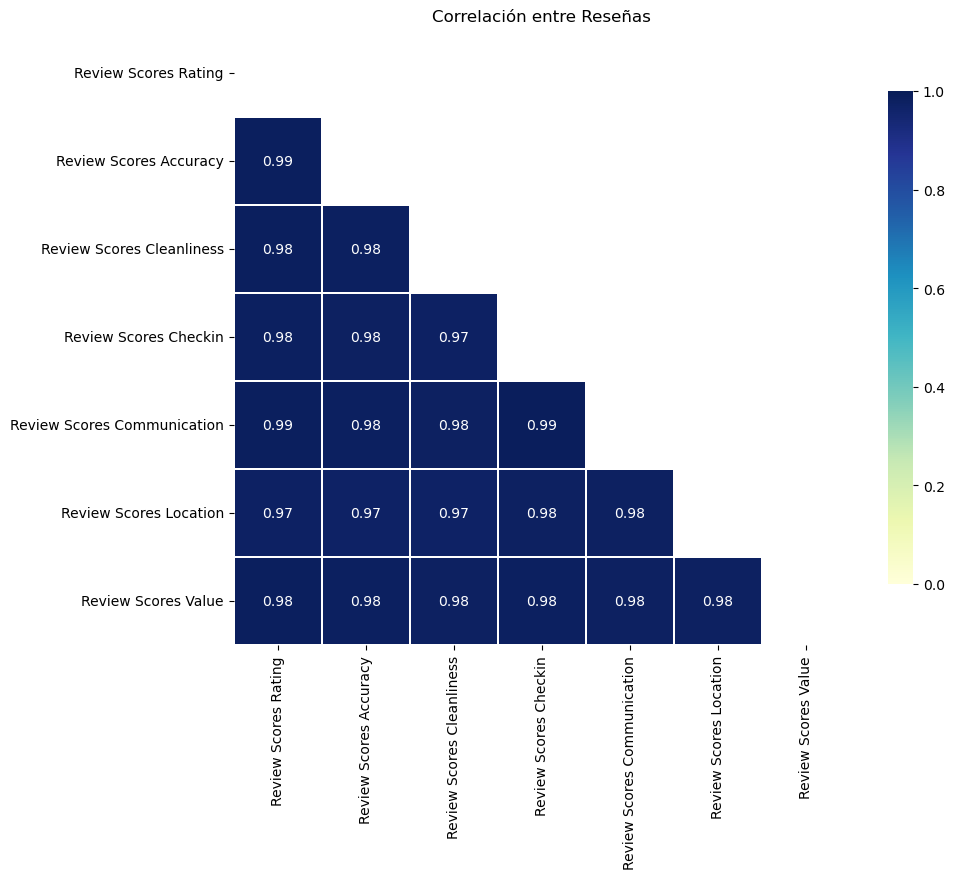

In [11]:
# 1. Selecciono solo las variables de reseñas
cols_reviews = [
    'Review Scores Rating', 
    'Review Scores Accuracy', 
    'Review Scores Cleanliness', 
    'Review Scores Checkin', 
    'Review Scores Communication', 
    'Review Scores Location', 
    'Review Scores Value'
]

# 2. Calculamos su correlación entre ellas, si me da un un valor alto significa que puedo seguir con mi idea
corr_reviews = train[cols_reviews].fillna(0).corr()

# 3. Visualizo
mask = np.zeros_like(corr_reviews, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))


sns.heatmap(corr_reviews, mask=mask, cmap="YlGnBu", vmin=0.0, vmax=1.0, center=0.5,
            square=True, linewidths=.1, cbar_kws={"shrink": .8}, annot=True)

plt.title('Correlación entre Reseñas')
plt.show()

In [12]:
# Casi son la misma todas, entonces puedo hacer la imputacion y luego unirlas 

In [13]:
# Lista de variables de reseñas secundarias (las de escala 0-10)
# Esto lo tuve que corregir en vializacion porque me sumo las de 100 y 10 lo que me daba 160 de maxima puntuacion 
cols_reviews_secundarias = [
    'Review Scores Accuracy',
    'Review Scores Cleanliness',
    'Review Scores Checkin',
    'Review Scores Communication',
    'Review Scores Location',
    'Review Scores Value'
]

# 1. Imputamos los nulos en la variable PRINCIPAL 'Review Scores Rating' (escala 0-100)
# Usamos la media de train para rellenar
rating_mean = train['Review Scores Rating'].mean()
train['Review Scores Rating'] = train['Review Scores Rating'].fillna(rating_mean)

# 2. Eliminamos las variables secundarias (altamente correlacionadas y con otra escala)
# Así evitamos el ruido y la redundancia.
train = train.drop(cols_reviews_secundarias, axis=1)

print("Variables de reseñas secundarias eliminadas.")
print("Mantenemos 'Review Scores Rating' como indicador principal.")

# Verificamos
print(train['Review Scores Rating'].describe())

Variables de reseñas secundarias eliminadas.
Mantenemos 'Review Scores Rating' como indicador principal.
count    11824.000000
mean        91.684371
std          7.955506
min         20.000000
25%         90.000000
50%         91.684371
75%         97.000000
max        100.000000
Name: Review Scores Rating, dtype: float64


In [14]:
# Con esto me he quitado un par de columnas, aqui tengo una duda, he seguido el modelo del ejercicio 3.1, no me acuerdo si en las clases habia una diferencia de hacer en el analisis
# correlacion y luego alta correlacion, como pone en el enunciado de la practica, creo que no pero ya me diras

In [15]:
# Sigo imputando columnas, ahora ire a nathrooms, bedrooms, beds, y host, aunque tienen pocos valores nulos, al ser numericos puedo imputarlso con la media


In [16]:

# Lista de variables específicas que suelen tener huecos
cols_estructurales = ['Bathrooms', 'Bedrooms', 'Beds']
cols_host = ['Host Response Rate', 'Host Listings Count', 'Calculated host listings count']

# Imputamos con la mediana
for col in cols_estructurales:
    if col in train.columns:
        mediana = train[col].median()
        train[col] = train[col].fillna(mediana)
        print(f"  - {col}: Imputado con {mediana}")

# Imputamos Host
for col in cols_host:
    if col in train.columns:
        media = train[col].mean()
        train[col] = train[col].fillna(media)
        print(f"  - {col}: Imputado con {media:.2f}")


  - Bathrooms: Imputado con 1.0
  - Bedrooms: Imputado con 1.0
  - Beds: Imputado con 2.0
  - Host Response Rate: Imputado con 94.74
  - Host Listings Count: Imputado con 12.54
  - Calculated host listings count: Imputado con 9.48


In [17]:
# Bueno no ha sido un gran cambio, pero algo hemos limpiado, como vi que me fui que no fue un gran cambio hice otro describe para ver como estaba la cosa

In [18]:
train.describe()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Calculated host listings count,Reviews per Month
count,11824.000000,11824.000000,11822.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11812.000000,...,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9283.000000
mean,94.742660,12.542294,12.542294,40.497385,-3.838638,3.264970,1.280151,1.341763,2.038143,73.633678,...,3.093623,954.575694,8.963210,22.974712,39.861130,201.679212,22.465071,91.684371,9.478048,1.865575
std,14.305348,34.212602,34.215496,4.590549,14.010897,2.091109,0.655380,0.902501,1.613291,72.260255,...,13.467700,9343.186589,9.345778,19.766598,29.712209,127.978537,37.715834,7.955506,23.627339,1.864372
min,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.000000,9.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.020000
25%,94.742660,1.000000,1.000000,40.409737,-3.707535,2.000000,1.000000,1.000000,1.000000,34.000000,...,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,1.000000,90.000000,1.000000,0.450000
50%,100.000000,2.000000,2.000000,40.419453,-3.700769,3.000000,1.000000,1.000000,2.000000,55.000000,...,2.000000,1125.000000,6.000000,20.000000,38.000000,237.500000,7.000000,91.684371,2.000000,1.190000
75%,100.000000,6.000000,6.000000,40.430843,-3.684171,4.000000,1.000000,2.000000,2.000000,87.000000,...,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,97.000000,5.000000,2.780000
max,100.000000,519.000000,519.000000,55.956716,153.371427,16.000000,8.000000,10.000000,16.000000,999.000000,...,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,145.000000,17.210000


In [19]:
# Precio tiene un valor diferente, me faltan datos, son 15 filas si precio, son pocas, por lo que valoro borrarlas, pero antes voy a mirar que tienen

In [20]:
# Filtramos el dataframe 'train' para ver solo las filas donde Price es nulo
filas_sin_precio = train[train['Price'].isnull()]

print(f"Se han encontrado {len(filas_sin_precio)} filas sin precio.")

# Mostramos las primeras filas para ver qué tienen de raro
print(filas_sin_precio.head().T)

Se han encontrado 12 filas sin precio.
                                                                            1691   \
Listing Url                                 https://www.airbnb.com/rooms/16199273   
Last Scraped                                                           2017-04-08   
Name                                           Private Room in Rios Rosas, Madrid   
Summary                         My place is close to El Corte Ingles, Nuevos M...   
Space                                                                         NaN   
...                                                                           ...   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                1.0   
Reviews per Month                                                             NaN   
Geolocation                                           40.4412509377,-3.6976986412   
Features                  

In [21]:
# Parece todo normal asi que borramos 

In [22]:
print(f"Filas antes de limpiar Price: {train.shape[0]}")
train = train.dropna(subset=['Price'])
print(f"Filas tras limpiar Price: {train.shape[0]}")

Filas antes de limpiar Price: 11824
Filas tras limpiar Price: 11812


In [23]:
# mirando esto me he dado cuenta de que hay Host Listings Count dos veces# 1. Definimos las dos columnas sospechosas
cols = ['Host Listings Count', 'Host Total Listings Count']
print(train[cols].isnull().sum())
print(train[cols].corr())

Host Listings Count          0
Host Total Listings Count    2
dtype: int64
                           Host Listings Count  Host Total Listings Count
Host Listings Count                        1.0                        1.0
Host Total Listings Count                  1.0                        1.0


In [24]:
# son la misma, me quedo con la primera que tienen 0 campos vacios
# Elimino
col_borrar = 'Host Total Listings Count'
train = train.drop(col_borrar, axis=1)

In [25]:
train.describe()

,Host Response Rate,Host Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,...,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Calculated host listings count,Reviews per Month
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,4982.000000,...,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,9278.000000
mean,94.756580,12.549956,40.502940,-3.853822,3.261514,1.278488,1.339909,2.035642,73.633678,190.148133,...,3.093549,954.654843,8.956570,22.964612,39.850406,201.648154,22.481036,91.683391,9.483274,1.866061
std,14.268219,34.228731,4.533788,13.949911,2.085611,0.650587,0.898463,1.607124,72.260255,116.467935,...,13.474346,9347.920978,9.337394,19.755862,29.696650,127.950372,37.729252,7.957797,23.638335,1.864630
min,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.020000
25%,94.742660,1.000000,40.409739,-3.707538,2.000000,1.000000,1.000000,1.000000,34.000000,100.000000,...,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,1.000000,90.000000,1.000000,0.450000
50%,100.000000,2.000000,40.419453,-3.700771,3.000000,1.000000,1.000000,2.000000,55.000000,150.000000,...,2.000000,1125.000000,6.000000,20.000000,38.000000,237.000000,7.000000,91.684371,2.000000,1.190000
75%,100.000000,6.000000,40.430843,-3.684215,4.000000,1.000000,2.000000,2.000000,87.000000,200.000000,...,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,97.000000,5.000000,2.780000
max,100.000000,519.000000,55.956716,153.371427,16.000000,8.000000,10.000000,16.000000,999.000000,990.000000,...,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,145.000000,17.210000


In [26]:
# Antes vi que habia barrios franceses y alguni de USA por lo que pense que quiza si barrios fuera de la UE eran muy pocos podia borrarlos, pero esto esta plagado, asi que
# de barrios de todo el lo dejo tal cual
lista_barrios = sorted(train['Neighbourhood'].dropna().astype(str).unique())

print(f"LISTADO COMPLETO ({len(lista_barrios)})")

# Imprimimos uno por uno para que puedas leerlos todos (el print qeda tan largo que luego no me deja seguir poniendo codigo por lo que lo comento)
#for barrio in lista_barrios:
 #   print(barrio)

LISTADO COMPLETO (349)


In [27]:
# Ahora viendo outliners veo que la noche maxima son 1m, para eso me la compro, claramente es un erro por lo que lo voy a quitar
# Igual que el de minimum nights con un max de 1125


In [28]:
train = train[train['Maximum Nights'] <= 2000]


In [29]:
train = train[train['Minimum Nights'] <= 180]


In [30]:
train.describe()

,Host Response Rate,Host Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,...,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Calculated host listings count,Reviews per Month
count,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,4968.000000,...,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000,9253.000000
mean,94.748029,12.557279,40.503007,-3.855536,3.259800,1.278296,1.338961,2.033769,73.632530,190.112721,...,2.854319,832.996097,8.949347,22.952486,39.832937,201.500085,22.469625,91.681983,9.486886,1.867128
std,14.282391,34.261689,4.538766,13.964478,2.084846,0.650784,0.896268,1.604368,72.295251,116.414119,...,5.243699,472.380410,9.332462,19.749276,29.688906,127.944558,37.741057,7.954050,23.659646,1.865436
min,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.020000
25%,94.742660,1.000000,40.409737,-3.707527,2.000000,1.000000,1.000000,1.000000,34.000000,100.000000,...,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,1.000000,90.000000,1.000000,0.450000
50%,100.000000,2.000000,40.419442,-3.700772,3.000000,1.000000,1.000000,2.000000,55.000000,150.000000,...,2.000000,1125.000000,6.000000,20.000000,38.000000,237.000000,7.000000,91.684371,2.000000,1.190000
75%,100.000000,6.000000,40.430850,-3.684183,4.000000,1.000000,2.000000,2.000000,87.000000,200.000000,...,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,97.000000,5.000000,2.780000
max,100.000000,519.000000,55.956716,153.371427,16.000000,8.000000,10.000000,16.000000,999.000000,990.000000,...,180.000000,2000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,145.000000,17.210000


In [31]:
#Borro la celda de weekly price

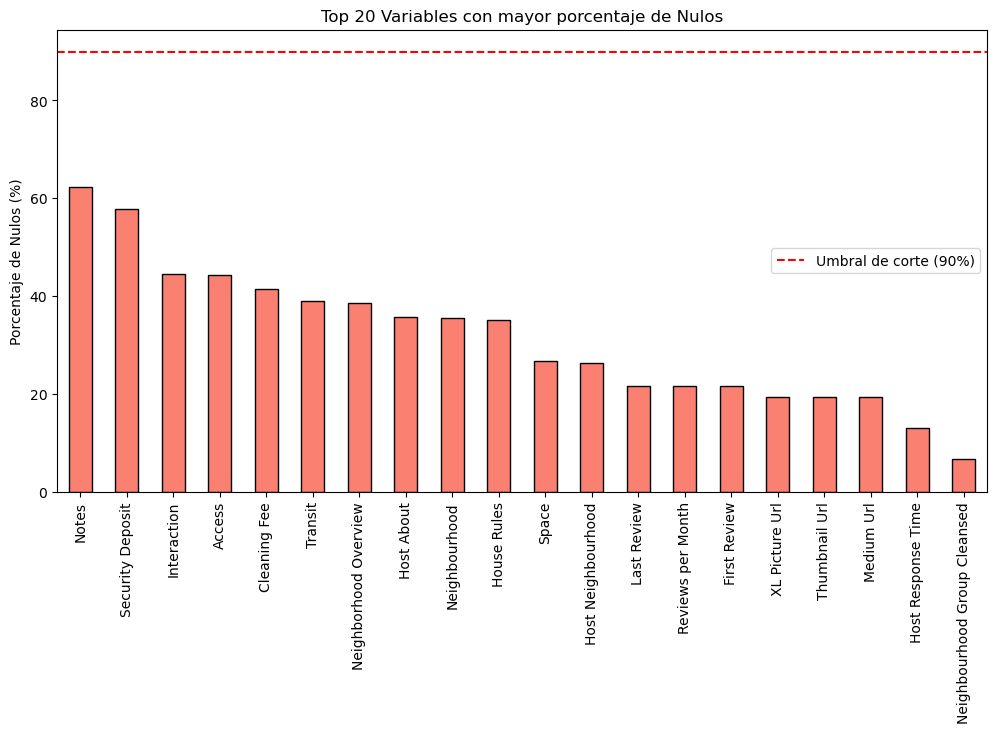

Columnas con más nulos:
Notes                           62.277278
Security Deposit                57.848295
Interaction                     44.578313
Access                          44.204989
Cleaning Fee                    41.405057
Transit                         39.046326
Neighborhood Overview           38.520278
Host About                      35.745800
Neighbourhood                   35.474292
House Rules                     35.109452
Space                           26.675717
Host Neighbourhood              26.268454
Last Review                     21.500085
Reviews per Month               21.491600
First Review                    21.491600
XL Picture Url                  19.234685
Thumbnail Url                   19.234685
Medium Url                      19.234685
Host Response Time              12.981503
Neighbourhood Group Cleansed     6.685899
Summary                          4.004751
Zipcode                          3.444765
Amenities                        1.094519
State     

In [32]:
# Vuelvo a hacer null_porcentaje para ver cuantos nulos tengo
null_porcentaje = train.isnull().mean() * 100

# Filtramos solo las que tienen algún nulo y ordenamos de mayor a menor
null_porcentaje = null_porcentaje[null_porcentaje > 0].sort_values(ascending=False)

# Visualización Gráfica
plt.figure(figsize=(12, 6))
null_porcentaje.head(20).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 20 Variables con mayor porcentaje de Nulos')
plt.ylabel('Porcentaje de Nulos (%)')
plt.axhline(y=90, color='red', linestyle='--', label='Umbral de corte (90%)') # Línea de corte visual
plt.legend()
plt.show()

# Mostramos los porcentajes exactos de las peores
print("Columnas con más nulos:")
print(null_porcentaje.head(100))

In [33]:
# Codigo corregido de mean coding

In [34]:
# Columnas que son texto
categorical = df.select_dtypes(include=['object']).columns
print(f"Variables a codificar: {list(categorical)}")

# Creo el mean map
mean_map = {}

# El codigo de categorical 
for c in categorical:
    
    mean = df.groupby(c)['Price'].mean()
    
    
    mean_map[c] = mean
    
    # uso c sobre df
    df[c] = df[c].map(mean)

# 4. Relleno los NAN 
media_global = df['Price'].mean()
df[categorical] = df[categorical].fillna(media_global)

df[categorical].head()

Variables a codificar: ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation', 'Features']


,Listing Url,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,...,Calendar Updated,Has Availability,Calendar last Scraped,First Review,Last Review,License,Jurisdiction Names,Cancellation Policy,Geolocation,Features
0,20.0,68.656525,20.0,22.3,22.300000,22.0,73.600034,21.379310,73.633678,21.739130,...,67.549669,73.633678,70.459790,51.916667,26.250000,73.633678,73.633678,86.824424,20.0,61.433038
1,86.0,68.656525,86.0,86.0,86.000000,86.0,73.600034,73.633678,86.000000,73.633678,...,67.307851,73.633678,68.000377,73.633678,73.633678,73.633678,73.633678,86.824424,86.0,72.929955
2,66.0,60.533333,66.0,66.0,73.633678,66.0,73.600034,73.633678,73.633678,73.633678,...,79.000000,73.633678,63.016393,73.633678,73.633678,73.633678,73.633678,63.606874,66.0,119.812183
3,30.0,68.656525,30.0,30.0,31.400000,30.0,73.600034,30.666667,30.666667,30.666667,...,67.307851,73.633678,70.459790,73.633678,73.633678,73.633678,73.633678,86.824424,30.0,71.970045
4,100.0,181.687285,100.0,100.0,100.000000,100.0,73.600034,100.000000,100.000000,100.000000,...,93.001929,73.633678,181.687285,99.800000,69.142857,73.633678,73.633678,86.824424,100.0,61.433038


In [35]:
#Creo que lo he limpiado lo suficiante por lo que vamos a visualizacion 

In [36]:
df.describe()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
count,1.182400e+04,11824.000000,1.182400e+04,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,...,9156.000000,9139.000000,9139.000000,11824.000000,11824.000000,11824.000000,11821.000000,9283.000000,11824.000000,11824.000000
mean,1.026022e+07,73.633678,2.017037e+13,73.694316,73.634831,73.162286,75.103300,73.610826,73.633643,72.012196,...,9.645151,9.532662,9.212058,74.311475,74.395812,73.631927,9.478048,1.865575,73.633678,73.638234
std,5.557168e+06,72.223575,5.726876e+08,26.646539,72.026555,70.302043,61.298355,71.915616,1.481120,50.710994,...,0.770007,0.777009,0.958257,9.734752,10.874117,12.480694,23.630338,1.864372,72.223575,18.984014
min,1.862800e+04,9.000000,2.016010e+13,20.000000,9.000000,9.000000,9.000000,9.000000,44.000000,9.000000,...,2.000000,2.000000,2.000000,25.000000,20.000000,63.606874,1.000000,0.020000,9.000000,25.000000
25%,5.556205e+06,34.000000,2.017041e+13,68.656525,34.000000,35.000000,45.000000,34.000000,73.600034,49.000000,...,9.000000,9.000000,9.000000,73.633678,73.633678,63.606874,1.000000,0.450000,34.000000,61.433038
50%,1.123371e+07,55.000000,2.017041e+13,68.656525,55.000000,59.000000,73.633678,55.000000,73.600034,73.633678,...,10.000000,10.000000,9.000000,73.633678,73.633678,65.295508,2.000000,1.190000,55.000000,71.970045
75%,1.531757e+07,87.000000,2.017041e+13,68.656525,87.000000,85.000000,75.000000,86.750000,73.600034,73.633678,...,10.000000,10.000000,10.000000,73.633678,73.633678,86.824424,5.000000,2.780000,87.000000,79.469880
max,1.858124e+07,999.000000,2.017062e+13,772.666667,999.000000,999.000000,999.000000,999.000000,130.200000,999.000000,...,10.000000,10.000000,10.000000,481.000000,999.000000,187.866667,145.000000,17.210000,999.000000,597.000000


In [37]:
#3. Visualizacion
# Voy a pintar un poco de todo para ver las graficas, a partir de ahi vemos


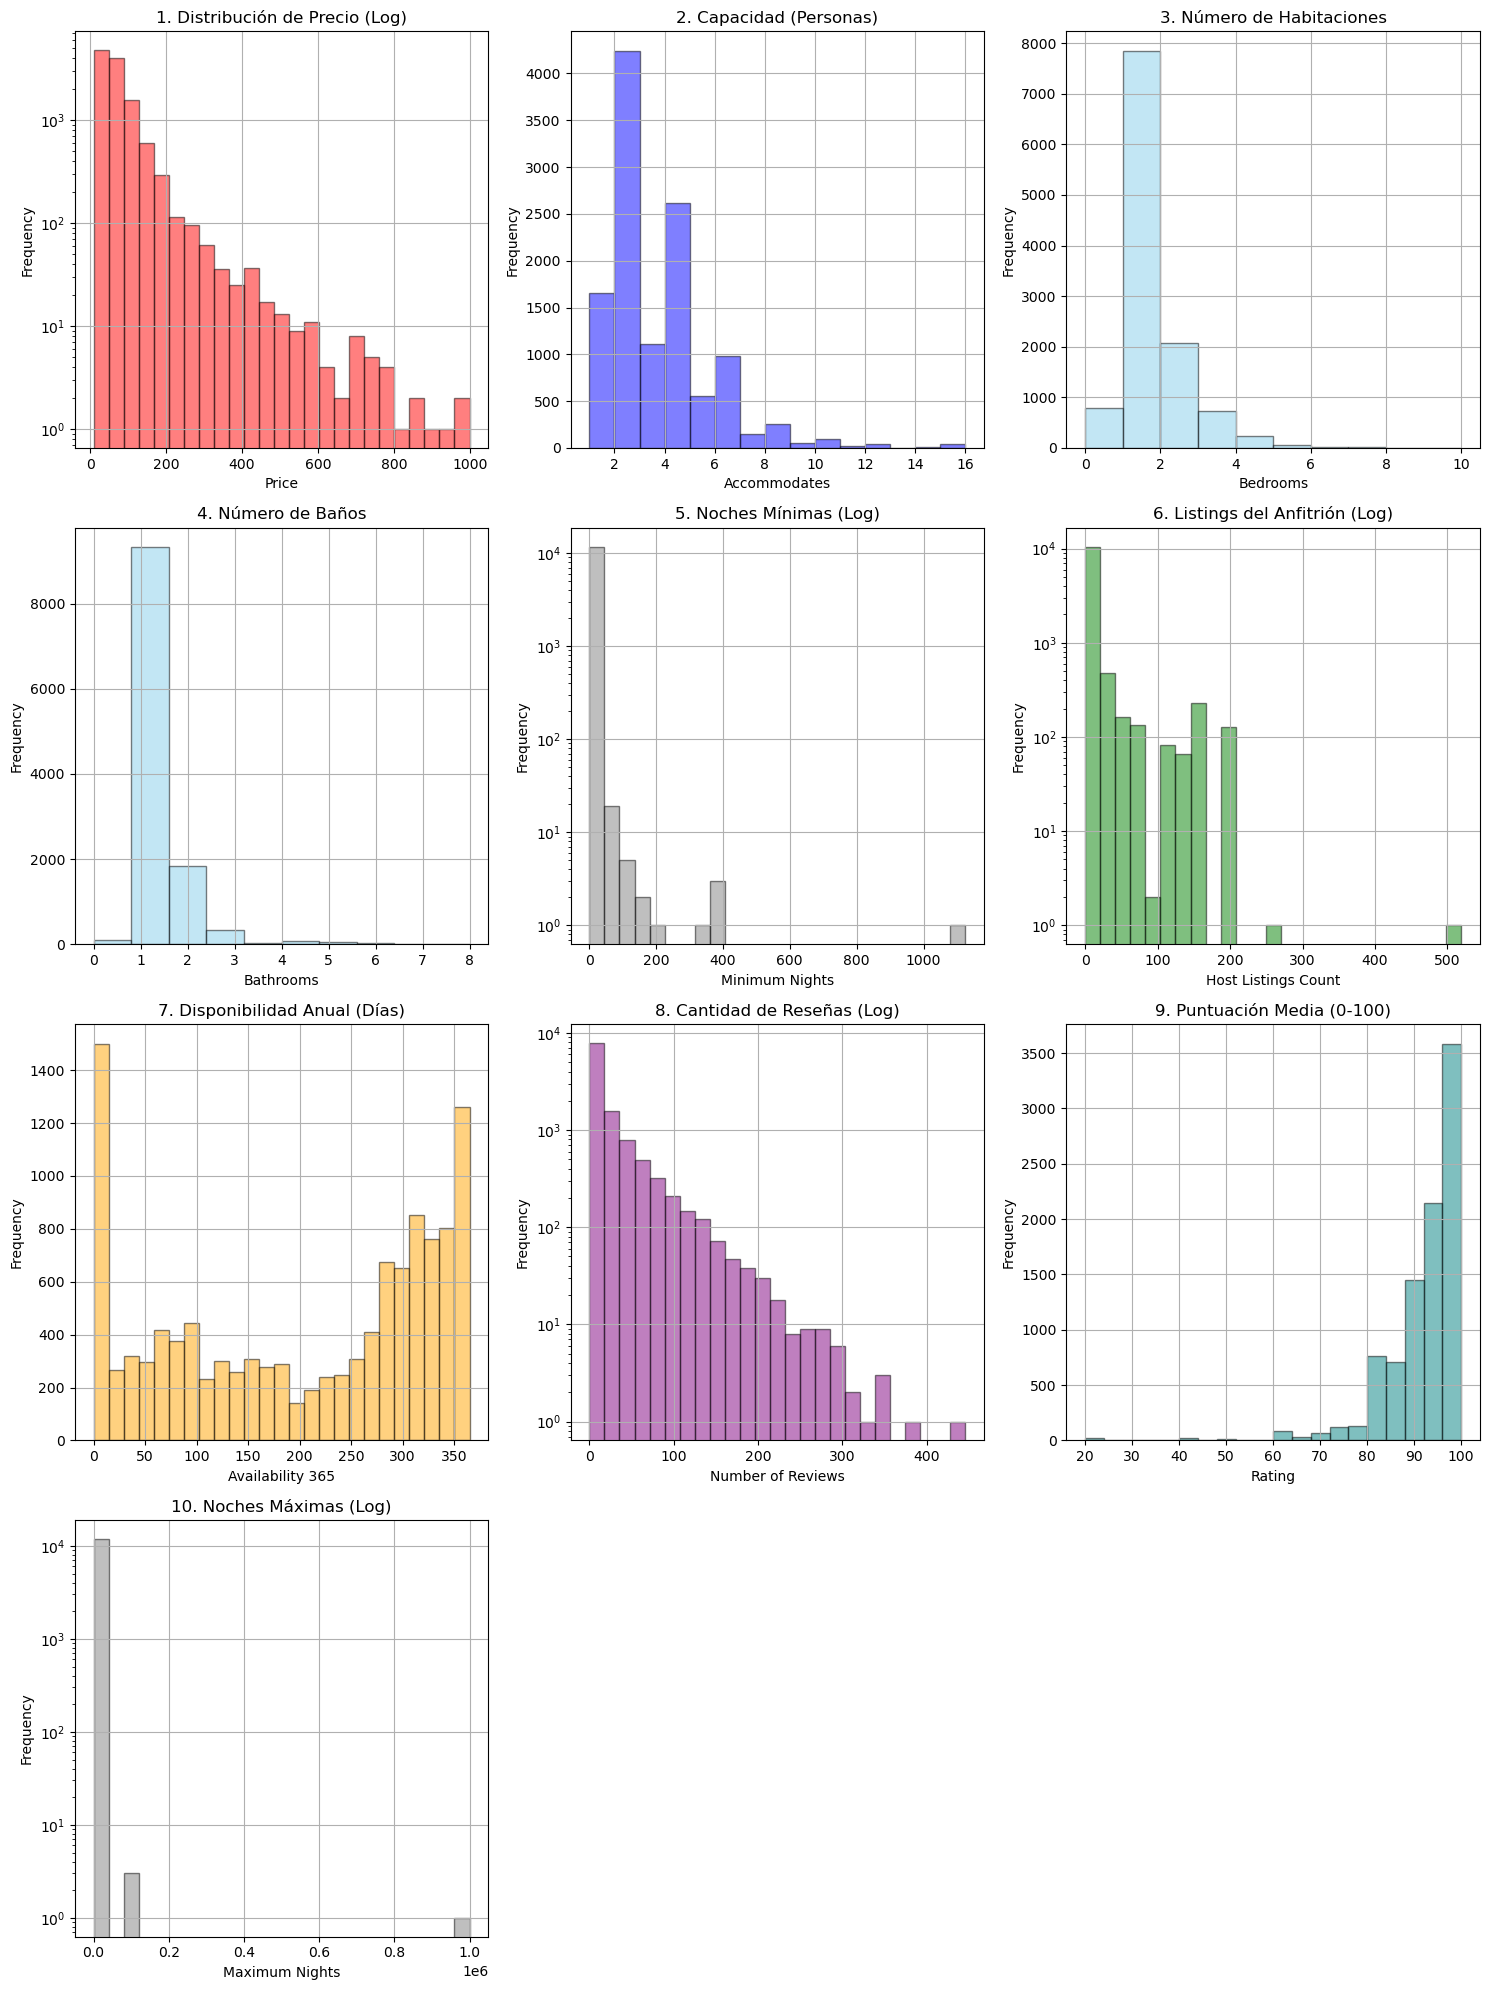

In [38]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 3, 1)
df['Price'].dropna().plot.hist(alpha=0.5, bins=25, grid=True, color='red', edgecolor='black')
plt.yscale('log')
plt.title("1. Distribución de Precio (Log)")
plt.xlabel('Price')

plt.subplot(4, 3, 2)
df['Accommodates'].dropna().plot.hist(alpha=0.5, bins=15, grid=True, color='blue', edgecolor='black')
plt.title("2. Capacidad (Personas)")
plt.xlabel('Accommodates')

plt.subplot(4, 3, 3)
df['Bedrooms'].dropna().plot.hist(alpha=0.5, bins=10, grid=True, color='skyblue', edgecolor='black')
plt.title("3. Número de Habitaciones")
plt.xlabel('Bedrooms')

plt.subplot(4, 3, 4)
df['Bathrooms'].dropna().plot.hist(alpha=0.5, bins=10, grid=True, color='skyblue', edgecolor='black')
plt.title("4. Número de Baños")
plt.xlabel('Bathrooms')

plt.subplot(4, 3, 5)
df['Minimum Nights'].dropna().plot.hist(alpha=0.5, bins=25, grid=True, color='gray', edgecolor='black')
plt.yscale('log')
plt.title("5. Noches Mínimas (Log)")
plt.xlabel('Minimum Nights')

plt.subplot(4, 3, 6)
df['Host Listings Count'].dropna().plot.hist(alpha=0.5, bins=25, grid=True, color='green', edgecolor='black')
plt.yscale('log')
plt.title("6. Listings del Anfitrión (Log)")
plt.xlabel('Host Listings Count')

plt.subplot(4, 3, 7)
df['Availability 365'].dropna().plot.hist(alpha=0.5, bins=25, grid=True, color='orange', edgecolor='black')
plt.title("7. Disponibilidad Anual (Días)")
plt.xlabel('Availability 365')

plt.subplot(4, 3, 8)
df['Number of Reviews'].dropna().plot.hist(alpha=0.5, bins=25, grid=True, color='purple', edgecolor='black')
plt.yscale('log')
plt.title("8. Cantidad de Reseñas (Log)")
plt.xlabel('Number of Reviews')

plt.subplot(4, 3, 9)
df['Review Scores Rating'].dropna().plot.hist(alpha=0.5, bins=20, grid=True, color='teal', edgecolor='black')
plt.title("9. Puntuación Media (0-100)")
plt.xlabel('Rating')

plt.subplot(4, 3, 10)
df['Maximum Nights'].dropna().plot.hist(alpha=0.5, bins=25, grid=True, color='gray', edgecolor='black')
plt.yscale('log')
plt.title("10. Noches Máximas (Log)")
plt.xlabel('Maximum Nights')

plt.tight_layout()
plt.savefig("distribucion_10_variables_final.png")

In [39]:
# Empezamos con precios, voy a mirar si me puedo quitar los precios de 600 para arriba

In [40]:
filtro_precios_altos = df['Price'] > 500
listings_caros = df[filtro_precios_altos]
num_listings_caros = len(listings_caros)
print(num_listings_caros)
print(f"Lo que representa un {num_listings_caros / len(df) * 100:.2f}% del total de listings.")

# OPCIONAL: También es útil ver el porcentaje.
# print(f"Porcentaje: {num_listings_caros / df.shape[0] * 100:.2f}%")

51
Lo que representa un 0.43% del total de listings.


In [41]:
# Me decido a eliminarlos, incluso con 500 es un 0.43 por lo que cojo ese rango

In [42]:
tamano_original = len(df)
umbral_precio = 500
df = df[df['Price'] <= umbral_precio]
tamano_nuevo = len(df)
filas_eliminadas = tamano_original-tamano_nuevo
print(f"Tamaño del dataset original: {tamano_original}")
print(f"Número de filas eliminadas: {filas_eliminadas}")

Tamaño del dataset original: 11824
Número de filas eliminadas: 63


In [43]:
filtro_precios_altos = df['Price'] > 500
listings_caros = df[filtro_precios_altos]
num_listings_caros = len(listings_caros)
print(num_listings_caros)
print(f"Lo que representa un {num_listings_caros / len(df) * 100:.2f}% del total de listings.")

# print(f"Porcentaje: {num_listings_caros / df.shape[0] * 100:.2f}%")

0
Lo que representa un 0.00% del total de listings.


In [44]:
# Lo he hecho de nuevo porque me parece raro que la grafica me siga apareciendo por encima de 500, lo dejo asi ya que haciendo el filtrado otra vez da 0 

In [45]:
# Siguiendo la estructura voy a usar scater plot para ver como actua precio con las variables explicativas (las xs)

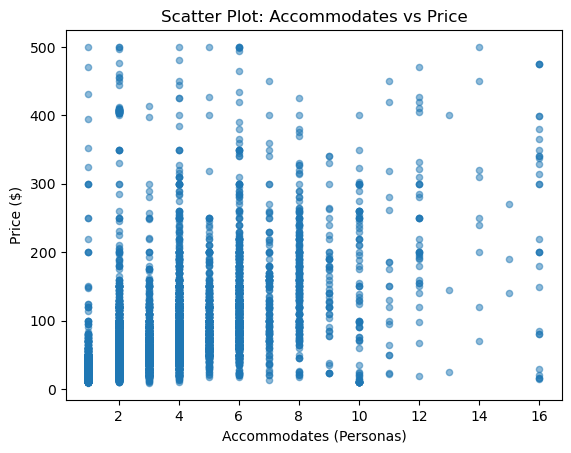

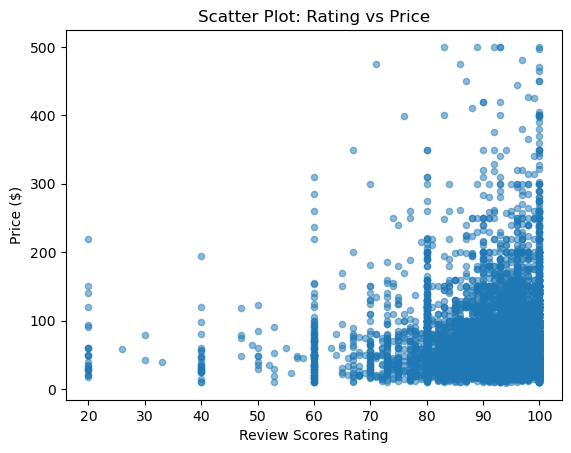

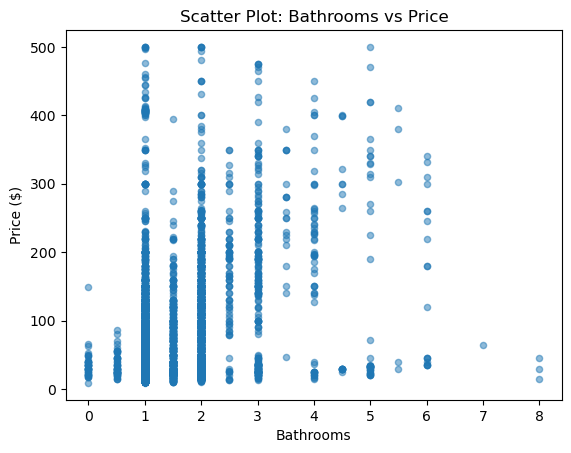

In [46]:
# Accommodates vs Price
df.plot(kind='scatter', x='Accommodates', y='Price', alpha=0.5)
plt.xlabel('Accommodates (Personas)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot: Accommodates vs Price')
plt.show()

# Review Scores Rating vs Price

df.plot(kind='scatter', x='Review Scores Rating', y='Price', alpha=0.5)
plt.xlabel('Review Scores Rating')
plt.ylabel('Price ($)')
plt.title('Scatter Plot: Rating vs Price')
plt.show()

# Bathrooms vs Price
df.plot(kind='scatter', x='Bathrooms', y='Price', alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.title('Scatter Plot: Bathrooms vs Price')
plt.show()

In [47]:
# Aqui veo algo raro, hay muchos airbnb que son de 16 personas pero no superan los 200, no creo que sea posible por lo que voy a eliminarlo tambien eliminare los que tienen 7 o mas banos y su precios
# es menor de 100

In [48]:
df = df[df['Bathrooms'] <= 6.1]

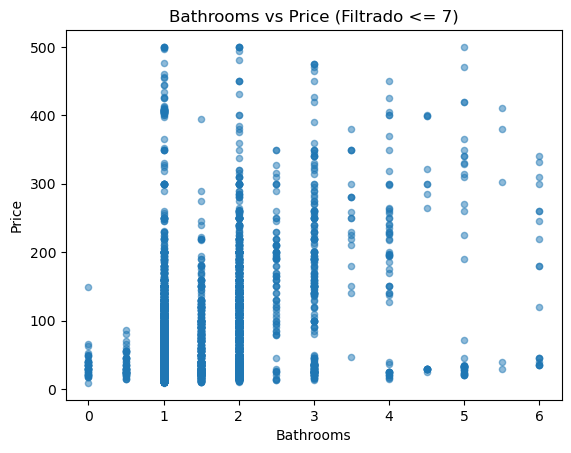

In [49]:
df.plot(kind='scatter', x='Bathrooms', y='Price', alpha=0.5)
plt.title('Bathrooms vs Price (Filtrado <= 7)')
plt.show()

In [50]:
# al final puse 6.1 porque con 7 aunque no me aprecia el numero den la grafica si que seguia habiendo un punto

In [51]:
# Tuve un monton de problemas al eliminar mediante condiconal, por lo que no lo pude hacer de forma sencilla como antes, tuve que crear otra variable y luego comparar
# asi lo pude comprobar, de la otra forma me daba error todo el rato 
rows_original = df.shape[0]

condicion_per_pr = (df['Accommodates'] > 10) & (df['Price'] < 100)

# Filtramos negando (~) la condición
df = df[~condicion_per_pr]

# Verificamos
rows_modified = df.shape[0]
print(f'Original: {rows_original} // Modificado: {rows_modified}')
print(f'Eliminados: {rows_original - rows_modified}')

Original: 11711 // Modificado: 11694
Eliminados: 17


In [52]:
# Iba a hacer la correlacion, pero me dio otro error, buscando me di cuenta que no tenia todos los datos en numericos, ya despues vi que podia solucionarlo con target enconding

In [53]:
print(df.dtypes)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

ID                                  int64
Listing Url                       float64
Scrape ID                           int64
Last Scraped                      float64
Name                              float64
                                   ...   
Cancellation Policy               float64
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                       float64
Features                          float64
Length: 87, dtype: object
[]


In [54]:
# Borre algunas columnas que veia que no podia sacar nada, space y description eran las misma

In [55]:
df = df.drop(['Name'], axis=1)

In [56]:
df = df.drop(['Space'], axis=1)

In [57]:
df = df.drop(['Description'], axis=1)

In [58]:
df = df.drop(['Summary'], axis=1)

In [59]:
print(df['Calendar last Scraped'])

0         70.459790
1         68.000377
2         63.016393
3         70.459790
4        181.687285
            ...    
11819     70.459790
11820     68.000377
11821     70.459790
11822     68.000377
11823     68.000377
Name: Calendar last Scraped, Length: 11694, dtype: float64


In [60]:
# Con las fechas he calculado la antiguedad y transformado el dato como en clase

In [61]:
if 'Host Since' in df.columns:
    df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
if 'Host Since' in df.columns:
    # Resto el año de referencia menos el año del registro
    # relleno y hago la moda para que no de errores en los vacios
    df['Host_Years'] = 2017 - df['Host Since'].dt.year
    df['Host_Years'] = df['Host_Years'].fillna(df['Host_Years'].mode()[0])

# Elimino columnas
date_cols_to_drop = ['Host Since', 'First Review', 'Last Review', 
                     'Calendar last Scraped', 'Last Scraped']

cols_existing = [c for c in date_cols_to_drop if c in df.columns]
df = df.drop(cols_existing, axis=1)

print(df.columns)
print(df['Host_Years'].head())

Index(['ID', 'Listing Url', 'Scrape ID', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maxim

In [62]:
print(df.dtypes)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

ID                                  int64
Listing Url                       float64
Scrape ID                           int64
Experiences Offered               float64
Neighborhood Overview             float64
                                   ...   
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                       float64
Features                          float64
Host_Years                          int32
Length: 79, dtype: object
[]


In [63]:
df = df.drop(['Listing Url'], axis=1)

In [64]:
print(df['House Rules'])

0        73.633678
1        86.000000
2        73.633678
3        31.000000
4        73.633678
           ...    
11819    40.000000
11820    42.000000
11821    73.633678
11822    47.000000
11823    73.633678
Name: House Rules, Length: 11694, dtype: float64


In [65]:
df = df.drop(['Experiences Offered'], axis=1)

In [66]:
df = df.drop(['Neighborhood Overview'], axis=1)

In [67]:
df = df.drop(['Notes'], axis=1)

In [68]:
df = df.drop(['Interaction'], axis=1)

In [69]:
df = df.drop(['Thumbnail Url'], axis=1)

In [70]:
df = df.drop(['Medium Url'], axis=1)

In [71]:
df = df.drop(['XL Picture Url'], axis=1)

In [72]:
df = df.drop(['Picture Url'], axis=1)

In [73]:
df = df.drop(['Host URL'], axis=1)

In [74]:
df = df.drop(['Host Name'], axis=1)

In [75]:
df = df.drop(['Host Thumbnail Url'], axis=1)

In [76]:
df = df.drop(['Host Picture Url'], axis=1)

In [77]:
df = df.drop(['Country'], axis=1)

In [78]:
print(df.dtypes)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

ID                                  int64
Scrape ID                           int64
Transit                           float64
Access                            float64
House Rules                       float64
                                   ...   
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                       float64
Features                          float64
Host_Years                          int32
Length: 65, dtype: object
[]


In [79]:
print(df['Calendar Updated'])

0        67.549669
1        67.307851
2        79.000000
3        67.307851
4        93.001929
           ...    
11819    64.871034
11820    63.452214
11821    67.549669
11822    93.001929
11823    64.871034
Name: Calendar Updated, Length: 11694, dtype: float64


In [80]:
# Con calendar queria hacer targetr enconder pero no le vi mucho sentido, creo que lo mas optimo era cambiar el texto por numeros, tipo hoy es 1, 1 week 7, 
def parse_calendar_updated(val):
    val = str(val).lower()
    
    if 'today' in val:
        return 1
    
    elif 'yesterday' in val:
        return 1
    
    
    elif 'never' in val:
        
        return 3650 
    # este valor lo puse para que como tope de fecha, fue mas complicado de lo que pensaba y tuve que corregir un monton de cosas 
    
    else:
        try:
            parts = val.split()
            if parts[0] == 'a':
                number = 1
            else:
                number = int(parts[0])
            
            if 'week' in val:      
                return number * 7
            elif 'month' in val:  
                return number * 30 
            elif 'day' in val:     
                return number
            else:
               
                return np.nan
        except:
           
            return np.nan

if 'Calendar Updated' in df.columns:
    df['Calendar Updated'] = df['Calendar Updated'].apply(parse_calendar_updated)

mean_days = df['Calendar Updated'].mean()
df['Calendar Updated'] = df['Calendar Updated'].fillna(mean_days)

print(df['Calendar Updated'].head(10))
print(df['Calendar Updated'].dtype)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Calendar Updated, dtype: float64
float64


In [81]:
print(df.dtypes)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

ID                                  int64
Scrape ID                           int64
Transit                           float64
Access                            float64
House Rules                       float64
                                   ...   
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                       float64
Features                          float64
Host_Years                          int32
Length: 65, dtype: object
[]


In [82]:
# Con el resto de variables dudo si borrarlas o no por lo que hare target encoding, la logica es la siguiente, si una columna tiene pocos valores distintos, es categorica, si tiene mucho puedo valorar borrarla

In [83]:
# Seleccionamos solo las columnas de tipo texto (object)
obj_cols = df.select_dtypes(include=['object']).columns
# Variables candidatas
vars_to_encode = []
# Variables candidatas a ser eliminadas
vars_to_drop = []

for col in obj_cols:
    unique_count = df[col].nunique()
    first_val = df[col].iloc[0] if len(df) > 0 else "N/A"
    
    # Si tiene menos de 50 valores únicos, es casi seguro una CATEGORÍA (Barrio, Tipo de casa)
    if unique_count < 50:
        vars_to_encode.append(col)
        
    # Si tiene muchos valores únicos (cercano al total de filas), es TEXTO/ID
    elif unique_count > 1000:
        vars_to_drop.append(col)
        
    # Zona gris
    else:
        vars_to_encode.append(col) # Solemos querer probar a codificarlas
print(f"-> Variables a codificar (Mean Encoding): {vars_to_encode}")
print(f"-> Variables a eliminar (Drop): {vars_to_drop}")

-> Variables a codificar (Mean Encoding): []
-> Variables a eliminar (Drop): []


In [84]:
df = df.drop(['Transit'], axis=1)

In [85]:
df = df.drop(['Access'], axis=1)

In [86]:
df = df.drop(['House Rules'], axis=1)

In [87]:
df = df.drop(['Host About'], axis=1)

In [88]:
df = df.drop(['Street'], axis=1)

In [89]:
df = df.drop(['Amenities'], axis=1)

In [90]:
df = df.drop(['Geolocation'], axis=1)

In [91]:
# Ahora si, hago el mean encoding, los meto en  un array que son muchos 

In [92]:
vars_to_encode = [
    'Host Location', 'Host Response Time', 'Host Acceptance Rate', 
    'Host Neighbourhood', 'Host Verifications', 'Neighbourhood', 
    'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 
    'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code'
        , 'Property Type', 'Room Type', 'Bed Type', 
    'Has Availability', 'License', 'Jurisdiction Names', 
    'Cancellation Policy', 'Features'
]

target = 'Price'
mean_map = {} 

for c in vars_to_encode:
    if c in df.columns:
        df[c] = df[c].astype(str) 
        mean = df.groupby(c)[target].mean()
        df[c] = df[c].map(mean)  
        mean_map[c] = mean  
        df[c] = df[c].fillna(df[target].mean())
print(df[vars_to_encode].dtypes.head())

#Sigo el modelo que pusiste en el 3.1 

Host Location           float64
Host Response Time      float64
Host Acceptance Rate    float64
Host Neighbourhood      float64
Host Verifications      float64
dtype: object


In [93]:
print(df.dtypes)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

ID                                  int64
Scrape ID                           int64
Host ID                             int64
Host Location                     float64
Host Response Time                float64
Host Response Rate                float64
Host Acceptance Rate              float64
Host Neighbourhood                float64
Host Listings Count               float64
Host Total Listings Count         float64
Host Verifications                float64
Neighbourhood                     float64
Neighbourhood Cleansed            float64
Neighbourhood Group Cleansed      float64
City                              float64
State                             float64
Zipcode                           float64
Market                            float64
Smart Location                    float64
Country Code                      float64
Latitude                          float64
Longitude                         float64
Property Type                     float64
Room Type                         

In [94]:
df.corr()

,ID,Scrape ID,Host ID,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Features,Host_Years
ID,1.000000,0.039346,0.613796,-0.081119,0.004500,0.002385,-0.022672,-0.013265,-0.022371,-0.022371,...,0.064969,0.027338,0.082714,-0.032559,-0.016942,-0.116951,-0.081090,0.202650,-0.106162,NaN
Scrape ID,0.039346,1.000000,0.037083,-0.037034,0.015007,0.017319,-0.548716,-0.049253,0.010194,0.010194,...,-0.011155,-0.003663,-0.014781,0.004333,-0.176258,0.010104,0.007814,-0.016368,-0.108255,NaN
Host ID,0.613796,0.037083,1.000000,-0.062313,-0.063931,-0.034631,-0.016344,-0.068280,-0.075656,-0.075656,...,0.022607,-0.020931,0.032526,-0.027515,-0.054077,-0.138752,-0.119222,0.166900,-0.134196,NaN
Host Location,-0.081119,-0.037034,-0.062313,1.000000,-0.014927,-0.000507,0.044080,0.156032,0.186890,0.186890,...,-0.001496,0.004219,0.010193,0.050064,0.160704,0.082849,0.241770,-0.091758,0.372623,NaN
Host Response Time,0.004500,0.015007,-0.063931,-0.014927,1.000000,0.296493,0.019436,0.063278,0.088222,0.088222,...,0.020958,0.058891,0.020667,0.032760,-0.007916,0.172644,0.073251,0.279985,0.142772,NaN
Host Response Rate,0.002385,0.017319,-0.034631,-0.000507,0.296493,1.000000,0.035790,0.009897,-0.009607,-0.009607,...,0.083500,0.050259,0.095597,0.024982,-0.001755,0.050045,-0.028830,0.182717,0.086890,NaN
Host Acceptance Rate,-0.022672,-0.548716,-0.016344,0.044080,0.019436,0.035790,1.000000,0.080354,-0.009793,-0.009793,...,0.008905,0.008200,0.018916,-0.002302,0.169628,-0.001199,-0.011310,0.021337,0.063395,NaN
Host Neighbourhood,-0.013265,-0.049253,-0.068280,0.156032,0.063278,0.009897,0.080354,1.000000,0.287050,0.287050,...,-0.017959,0.217023,0.009554,0.122683,0.257440,0.158684,0.221879,0.010759,0.162573,NaN
Host Listings Count,-0.022371,0.010194,-0.075656,0.186890,0.088222,-0.009607,-0.009793,0.287050,1.000000,1.000000,...,-0.211982,-0.047773,-0.148776,0.033480,-0.027427,0.293322,0.919966,-0.152652,0.271012,NaN
Host Total Listings Count,-0.022371,0.010194,-0.075656,0.186890,0.088222,-0.009607,-0.009793,0.287050,1.000000,1.000000,...,-0.211982,-0.047773,-0.148776,0.033480,-0.027427,0.293322,0.919966,-0.152652,0.271012,NaN


In [95]:
# Bieeeen, joe ha costado, ahora copio y pego el codigo que nos diste 

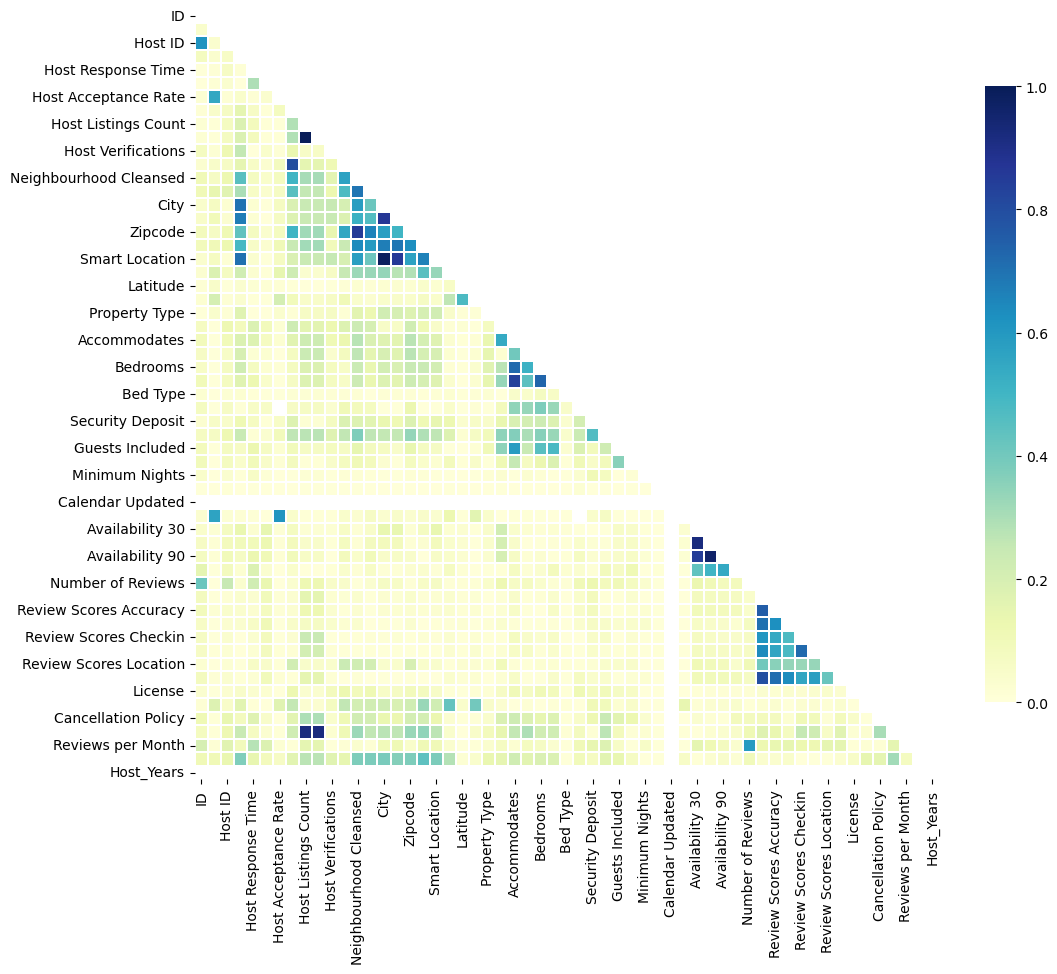

In [96]:
# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [97]:
# Lo probe, al ver que tardaba mas de 30s mire como iba en la ruedita y me di cuenta que era imposible ver todos 
# pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
# plt.show()

In [98]:
# Mirando la correlacion pense que habia quitado los reviews, 

In [99]:
# Queria eliminar todas al correlaciones mayores que 0.95, el caso es que no queria hacer una lista tan grande de borrado como las que hice antes asi que 
# busqye como hacerlo en python y encontre esta web https://discuss.python.org/t/correlation-matrix/31261
# Aparte voy a borrar id, scrpae id y host id


In [100]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(to_drop, axis=1)

In [101]:
df = df.drop(['ID'], axis=1)

In [102]:
df = df.drop(['Scrape ID'], axis=1)

In [103]:
df = df.drop(['Host ID'], axis=1)

In [104]:
# Una nueva caracteristica que puedo usar es camas/aseos para ver si hay algun dato interesante por la proporcion de la casa

In [105]:
df['Beds_Bath_Interaction'] = df['Beds'] * df['Bathrooms']

In [106]:
# TRAIN TEST Aqui he ido copiando y pegando un poco siguiendo el 3.1 y luego el de bicis para ver como funcionaba, 

In [107]:
# He puesto este filtro de outliners entre 10 y 600, sin el los resultados que
df = df[(df['Price'] > 10) & (df['Price'] < 600)]

# Hago limpieza de estas filas, quitando el dollar o la coma, convierto a numero y relleno huecos
money_cols = ['Security Deposit', 'Cleaning Fee', 'Extra People']
for col in money_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('$', '').str.replace(',', '')
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Hago la imputacion numerica
num_cols = df.select_dtypes(include=[np.number]).columns
impute_map = {} 
for col in num_cols:
    if col != 'Price':
        median_val = df[col].median()
        impute_map[col] = median_val
        df[col] = df[col].fillna(median_val)

# Mean coding
cat_cols = df.select_dtypes(include=['object']).columns
target = 'Price'
mean_map = {} 

for col in cat_cols:
    mean_price = df.groupby(col)[target].mean()
    mean_map[col] = mean_price
    df[col] = df[col].map(mean_price)
    df[col] = df[col].fillna(df[target].mean())

# Creo la variable beds_bath
df['Beds_Bath'] = df['Beds'] * df['Bathrooms']

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

#df = df[(df['Price'] > 10) & (df['Price'] < 600)]

# He excluido todas estas columnas, para asegurarme que la limpieza de datos funcione
cols_to_exclude = ['Price', 'ID', 'Host ID', 'Scrape ID', 'Zipcode', 'Latitude', 'Longitude']
X_train = df.select_dtypes(include=[np.number]).drop(cols_to_exclude, axis=1, errors='ignore')
y_train = df['Price']

train_stats = X_train.describe().T 

# Esto lo hago para que cualquier hueco vacio me lo rellene con 0 y asi lasso funcione
X_train = X_train.fillna(0)
features = X_train.columns

# Escalado, lo que hablamos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Lasso
lasso = Lasso(max_iter=5000)
grid = GridSearchCV(lasso, param_grid={'alpha': [0.1, 1, 10]}, cv=5)
grid.fit(X_train_scaled, y_train)
best_lasso = grid.best_estimator_

# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

print(f"   -> R2 Lasso (Train): {best_lasso.score(X_train_scaled, y_train):.4f}")
print(f"   -> R2 Random Forest (Train): {rf.score(X_train, y_train):.4f}")


# Cargar Test
df_test = pd.read_csv('./data/test_airbnb.csv', sep=';', decimal='.')

# filtro tambien en test
df_test = df_test[(df_test['Price'] > 10) & (df_test['Price'] < 600)]

# Mean Encoding
if 'mean_map' in globals():
    for c in mean_map:
        if c in df_test.columns:
            df_test[c] = df_test[c].map(mean_map[c]).fillna(media_global)

# Rellenar Nulos y Recorte de Outliers
for col in features:
    if col in df_test.columns: 
        if df_test[col].dtype == object:
             df_test[col] = df_test[col].astype(str).str.replace('$', '').str.replace(',', '')
        df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
        # Imputo
        if 'impute_map' in globals() and col in impute_map:
            df_test[col] = df_test[col].fillna(impute_map[col])
        else:
            df_test[col] = df_test[col].fillna(0)
        # Aqui hago clipping para evitar el lasso en negativo
        max_train = train_stats.loc[col, 'max']
        min_train = train_stats.loc[col, 'min']
        df_test[col] = df_test[col].clip(lower=min_train, upper=max_train)
    else:
        df_test[col] = 0

X_test = df_test[features]
y_test = df_test['Price']

# Hago fillna por si quedo alguno de la media
X_test = X_test.fillna(0) 

# Evaluo
X_test_scaled = scaler.transform(X_test)

print(f"Lasso R2 (Test):         {best_lasso.score(X_test_scaled, y_test):.4f}")
print(f"Random Forest R2 (Test): {rf.score(X_test, y_test):.4f}")


   -> R2 Lasso (Train): 0.6659
   -> R2 Random Forest (Train): 0.8496
Lasso R2 (Test):         0.4018
Random Forest R2 (Test): 0.3382


In [ ]:
#Hay una gran diferenecia entre Train y Test, especialmente en el Random Forest. En entrenamiento saqué un 0.849 en random y un 0.66 en lasso,
#pero luego en el test saco 0.33 y 0.4 respectivamente lo que me lleva a pensar que el modelo aprendio de memoria los datos de entrenamiento, esto en Random Forest. 

#Lasso ha conseguido un mejor resultado, habria que revisar las variables, quiza haya algunas que esten haciendo mucho ruido, pero no vi
#ninguna que tuviera un pico que me descuadrada despues de hacer la limpieza de datos, quizahay muchas variables que esten relacionadas entre si generando ruido y lasso
#al ser generalista lo entiende mejor. 


In [ ]:
#He ido corrigiendo cada una de las cosas que me pusiste en el correo sobretodo la cagada de mezclar train y test, espero que este bien y si no me dices!